In [11]:
import os
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [20]:

def preprocess_image(image_path, output_folder):
    image = cv2.imread(image_path)

    # Remove noise using GaussianBlur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Resize the image to 256x256
    resized_image = cv2.resize(blurred_image, (256, 256))
    output_path = os.path.join(output_folder, os.path.basename(image_path))
    cv2.imwrite(output_path, resized_image)
    return output_path
def modify_xml(xml_path, output_folder, new_image_path):
    # Load the XML file
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Update filename, path, and size in XML
    root.find('filename').text = os.path.basename(new_image_path)
    root.find('path').text = os.path.abspath(new_image_path)
    root.find('size/width').text = '256'
    root.find('size/height').text = '256'

    # Update bndbox coordinates based on the resized image
    xmin = int(root.find('object/bndbox/xmin').text)
    ymin = int(root.find('object/bndbox/ymin').text)
    xmax = int(root.find('object/bndbox/xmax').text)
    ymax = int(root.find('object/bndbox/ymax').text)

    scale_factor_width = 256 / int(root.find('size/width').text)
    scale_factor_height = 256 / int(root.find('size/height').text)

    root.find('object/bndbox/xmin').text = str(int(xmin * scale_factor_width))
    root.find('object/bndbox/ymin').text = str(int(ymin * scale_factor_height))
    root.find('object/bndbox/xmax').text = str(int(xmax * scale_factor_width))
    root.find('object/bndbox/ymax').text = str(int(ymax * scale_factor_height))

    output_xml_path = os.path.join(output_folder, os.path.basename(xml_path))
    tree.write(output_xml_path)



#Before preprocess


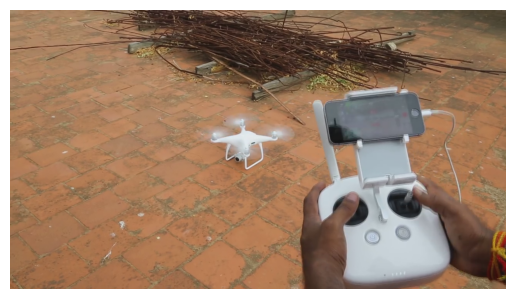

In [23]:
#Sample Image Before
image_path ="/content/images/foto00088.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

In [24]:

input_folder = '/content/images'
output_folder = '/content/images'
# Iterate over all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png'):
        # Construct full paths for the image and XML file
        image_path = os.path.join(input_folder, filename)
        xml_path = os.path.join(input_folder, filename.replace('.png', '.xml'))

        # Check if the corresponding XML file exists
        if os.path.exists(xml_path):
            # Preprocess the image
            new_image_path = preprocess_image(image_path, output_folder)

            # Modify and save the XML
            modify_xml(xml_path, output_folder, new_image_path)


# After Preprocess

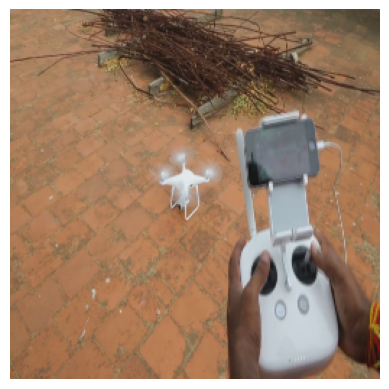

In [26]:
image_path ="/content/images/foto00088.png"

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image at its original size
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()